## *Activity: Sentiment Analysis*

# I. The Data

## 1.   Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
filename = '/content/drive/MyDrive/DaaS-109/data_daas_109.csv'
data = pd.read_csv(filename)

## 2. Explore Data

In [ ]:
from IPython.display import display, HTML

display(data)

,UserId,ProductId,Product Name,Summary,Text
0,AU2LNDRGFOS8J,7310172101,Dog Treat,very good,This product is a very health snack for your p...
1,A3RRSB7FFM07ZU,7310172101,Dog Treat,Dogs Love These!,My girls love these. I cut them up smaller and...
2,AFH6TT0SWN59L,7310172101,Dog Treat,Fast shipment,This is 2.5 oz larger than what you can find i...
3,ALAA0P3GK1VBR,7310172101,Dog Treat,Dogs Love It,I have one dog that is a picky eater. I crumbl...
4,A3EKHSRZKXRIFK,7310172101,Dog Treat,Golden loves them!,My Golden can get picky and eating is not a pr...
...,...,...,...,...,...
1077,A3T0OTH5072YRE,B004Z33GI6,Lemonade,Honest Ade Classic Lemonade,"This was pretty bad. Not completely terrible,..."
1078,A1UUPKHLG9MR9L,B004Z33GI6,Lemonade,Awful.,This stuff is terrible. There must be a huge ...
1079,A1N65D9MJX89GI,B004Z33GI6,Lemonade,AMAZING AND ADDICTING!,This is the best and most delicious 0-cal drin...
1080,AELQNIEEB4Y40,B004Z33GI6,Lemonade,Beware..your results may vary,This product is very hit or miss for people. I...


What are the unique products?

In [ ]:
# View all unique products
unique_products_set = set(data['Product Name'])
print(f"Unique Products: {unique_products_set}")
print(f"Number of unique products: {len(unique_products_set)}")

Unique Products: {'Peanut Butter', 'Salad Dressing', 'Beans', 'Brownies', 'Pest Control', 'Lemonade', 'Dog Treat', 'Pretzels', 'Movie', 'Pasta'}
Number of unique products: 10


# II. Sentiment Analysis

## 1. Load machine learning library

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##2. Get Sentiment scores for each review

In [ ]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [0]*len(data)
sentiment = ['Neutral']*len(data)

review_column = 'Summary'
for i,review in enumerate(data[review_column]):
  if review != review:
    continue
  scores = sia.polarity_scores(review)
  compound_score = scores['compound']
  sentiment_scores[i] = compound_score
  if compound_score > 0:
    sentiment[i] = 'Positive'
  if compound_score < 0:
    sentiment[i] = 'Negative'
  product = 'Product Name'
  summary = 'Summary'
  print(f"{data[product][i]}:  \t{sentiment[i]}, \t{sentiment_scores[i]}\t\t{data[summary][i]} ")


Dog Treat:  	Positive, 	0.4927		very good 
Dog Treat:  	Positive, 	0.6696		Dogs Love These! 
Dog Treat:  	Neutral, 	0.0		Fast shipment 
Dog Treat:  	Positive, 	0.6369		Dogs Love It 
Dog Treat:  	Positive, 	0.6114		Golden loves them! 
Dog Treat:  	Positive, 	0.5719		Corgi loves it 
Dog Treat:  	Positive, 	0.6597		Healthy High Quality Dog Treat 
Dog Treat:  	Positive, 	0.8126		Save the best for training 
Dog Treat:  	Positive, 	0.7579		great product & value 
Dog Treat:  	Positive, 	0.6369		Best Dog Treats 
Dog Treat:  	Positive, 	0.6369		dogs love them 
Dog Treat:  	Neutral, 	0.0		Liv-r licious! 
Dog Treat:  	Positive, 	0.5719		Excellent Product and Made in U.S.A. 
Dog Treat:  	Neutral, 	0.0		Liver treats 
Dog Treat:  	Positive, 	0.6696		Dogs love them! 
Dog Treat:  	Positive, 	0.5093		A favorite! 
Dog Treat:  	Positive, 	0.6597		Pro-Treat Beef Liver Freeze Dried, Best Part Of Rudy's Day 
Dog Treat:  	Positive, 	0.5719		Puppy loves these 
Dog Treat:  	Positive, 	0.6588		Great! 
Dog Treat

##3. Get average Sentiment score for each product

In [ ]:
from collections import defaultdict, Counter

# unique_products_list = list(unique_products_set)
# print(unique_products_list)

added_scores_map = defaultdict(int)
for i,product in enumerate(data['Product Name']):
  added_scores_map[product] += sentiment_scores[i]

# get counts of each product and divide each sentiment sum by each count to get averages
num_product_items = Counter(data['Product Name'])
unique_products_list = list(unique_products_set)
for product in unique_products_list:
  added_score = added_scores_map[product]
  product_count = num_product_items[product]
  added_scores_map[product] = round(added_score/product_count, 4)
  print(f'{product}:  {added_scores_map[product]}')

avg_sentiment_scores_map = added_scores_map
from collections import defaultdict, Counter
num_product_items = Counter(data['Product Name'])
print(avg_sentiment_scores_map)

Peanut Butter:  -0.1312
Salad Dressing:  -0.2549
Beans:  0.5047
Brownies:  0.5122
Pest Control:  0.0321
Lemonade:  -0.1538
Dog Treat:  0.4406
Pretzels:  0.5241
Movie:  0.246
Pasta:  0.5124
defaultdict(<class 'int'>, {'Dog Treat': 0.4406, 'Movie': 0.246, 'Pest Control': 0.0321, 'Brownies': 0.5122, 'Salad Dressing': -0.2549, 'Pretzels': 0.5241, 'Beans': 0.5047, 'Pasta': 0.5124, 'Peanut Butter': -0.1312, 'Lemonade': -0.1538})


In [ ]:
# put results into a dataframe for easier use later
products = []
sentiment_scores = []
for i,key in enumerate(avg_sentiment_scores_map):
  products.append(key)
  sentiment_scores.append(avg_sentiment_scores_map[key])

averages_data = pd.DataFrame(columns=['Sentiment Score', 'Product Name'])
averages_data['Sentiment Score'] = sentiment_scores
averages_data['Product Name'] = products

display(averages_data)

,Sentiment Score,Product Name
0,0.4406,Dog Treat
1,0.2460,Movie
2,0.0321,Pest Control
3,0.5122,Brownies
4,-0.2549,Salad Dressing
5,0.5241,Pretzels
6,0.5047,Beans
7,0.5124,Pasta
8,-0.1312,Peanut Butter
9,-0.1538,Lemonade


# III. Visualize Results

## 1. Load visualization libraries

In [ ]:
pip install tiobeindexpy

In [ ]:
from tiobeindexpy import tiobeindexpy as tbpy
import seaborn as sns

##2. Sentiment Scores Bar Chart

Text(0.5, 1.0, 'Product Sentiment Scores')

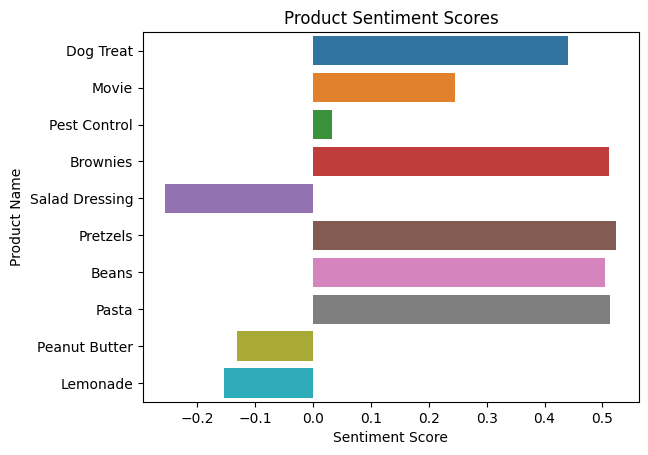

In [ ]:
sns.barplot(x = 'Sentiment Score', y = 'Product Name', data = averages_data).set_title('Product Sentiment Scores')

# below is for if you want to export the dataframe as a csv file
#from google.colab import files
#averages_data.to_csv('averages_data.csv', encoding='utf-8', index = False)
#files.download('averages_data.csv')

## 3. Word Cloud Visualization by Product

In [ ]:
# Here's how one can isolate and get the summaries of just one product.
#    In the example we're getting all the Movie review summaries:
product_summaries_list = str(list(data.loc[data['Product Name'] == 'Movie']['Summary']))
print(product_summaries_list)

['A Wacky Entertaining Look At The Afterlife', 'Funny great movie for kids adults anyone with a sense of humor!', 'Beetlejuice', 'A Great Classic', 'boring', 'Just gets better with age!', 'BEETLEJUICE..A TIM BURTON CLASSIC!', "One of Tim Burton's best movies", 'Great Movie', 'Its Beetlejuice....', 'Remember this as a funny movie!', 'Beetlejuice (20th Anniversary Deluxe Edition:', 'I love this movie!', 'A Really Bizarre Spectacle. Classic Tim Burton.', 'Beetlejuice and My Grandkids', 'three times', 'timeless', 'a classic', 'Awesome movie!', 'great', 'Beetlejuice', 'Adventuresome and comedic entertainment', 'Beetlejuice x 3', 'Classic', 'Love this Movie', 'Love this movie!', 'I LOVE THIS MOVIE!!!!!!!!!!!!!!!!!!!!!!!', 'Beetlejuice', 'Beetlejuice', 'sweet', 'Beetlejuice', 'Fun for the Whole Family', "AMERICA'S CRITIC", 'I love this movie!!!', 'Beetlejuice', '1988 Tim Burton film, dvd.', 'Fun Then, Fun Now; Blu-Ray An Upgrade', 'BeetleFun', 'Beetlejuice Beetlejuice Beetlejuice', 'Cool Movi

In [ ]:
pip install wordcloud

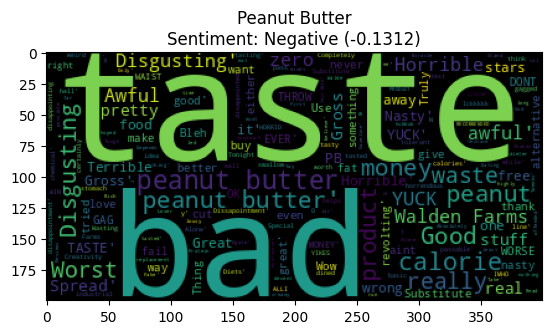

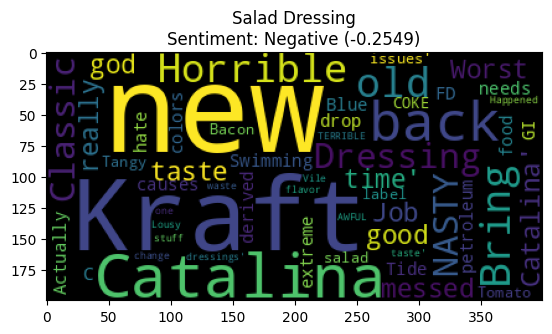

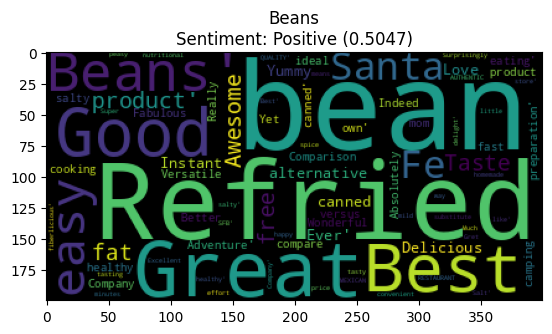

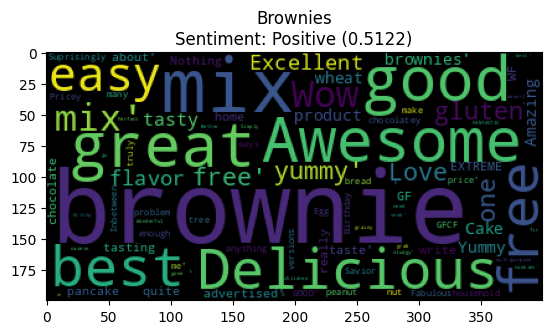

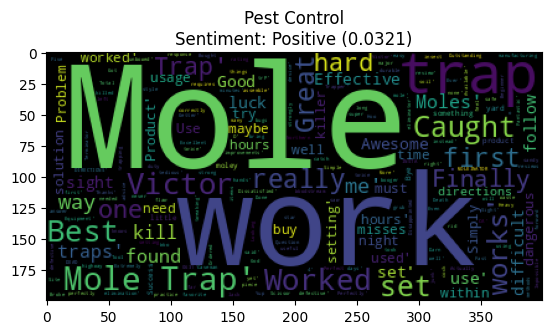

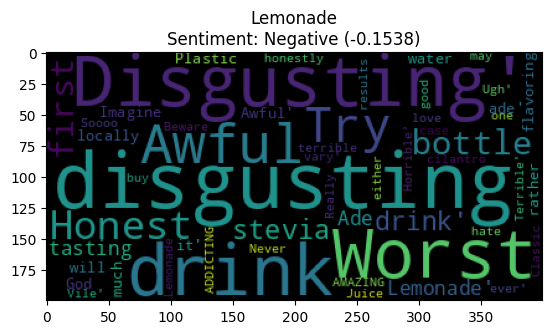

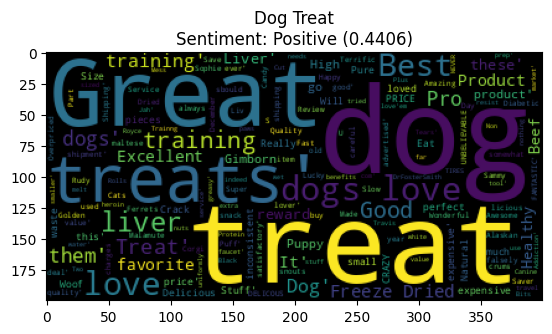

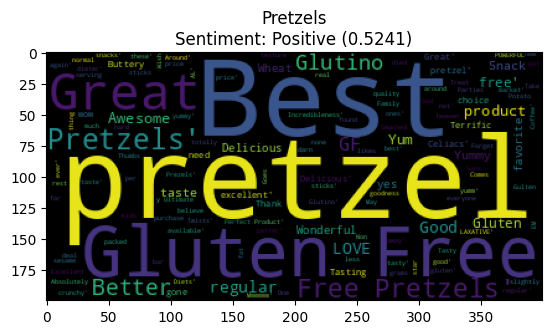

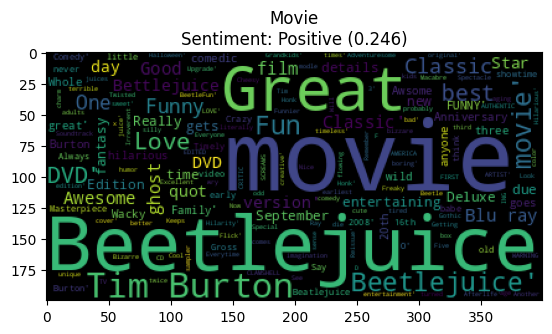

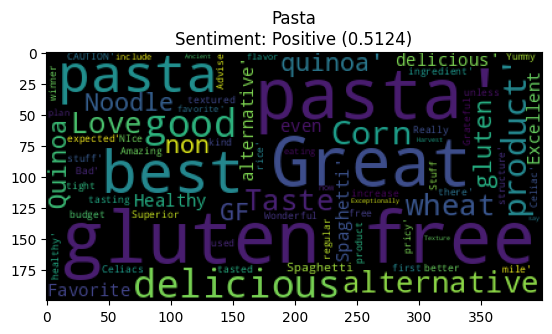

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

for product in unique_products_list:
  product_summaries_list = str(list(data.loc[data['Product Name'] == product]['Summary']))
  product_rating = avg_sentiment_scores_map[product]
  rating_label = 'Positive' if product_rating > 0 else 'Negative'
  #print(product_summaries_list)
  plt.figure()
  plt.subplot().set_title(f'{product}\nSentiment: {rating_label} ({product_rating})')
  plt.imshow(WordCloud().generate(product_summaries_list))
  plt.show()